In [12]:
from rsome import ro
from rsome import grb_solver as grb
import rsome as rso
import numpy as np


n = 150                                 # number of stocks
i = np.arange(1, n+1)                   # indices of stocks
p = 1.15 + i*0.05/150                   # mean returns
delta = 0.05/450 * (2*i*n*(n+1))**0.5   # deviations of returns
Gamma = 5                               # budget of uncertainty

model = ro.Model()              
x = model.dvar(n)                       # fractions of investment
z = model.rvar(n)                       # random variables

model.maxmin((p + delta*z) @ x,         # the max-min objective
             rso.norm(z, np.infty) <=1, # uncertainty set constraints
             rso.norm(z, 1) <= Gamma)   # uncertainty set constraints
model.st(sum(x) == 1)                   # summation of x is one
model.st(x >= 0)                        # x is non-negative

model.solve(grb)                        # solve the model by Gurobi

Being solved by Gurobi...
Solution status: 2
Running time: 0.0080s


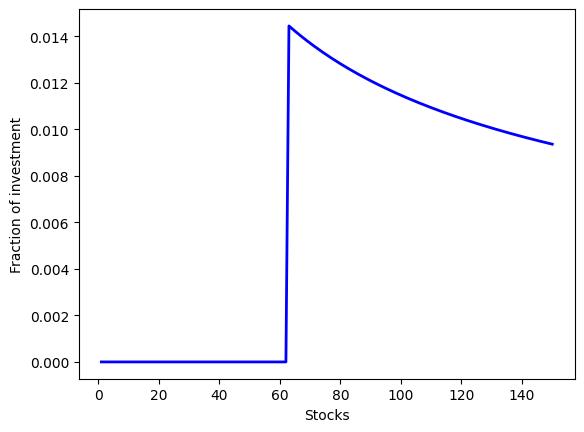

Objective value: 1.1709


In [13]:
import matplotlib.pyplot as plt

obj_val = model.get()                   # the optimal objective value
x_sol = x.get()                         # the optimal investment decision

plt.plot(range(1, n+1), x_sol, linewidth=2, color='b')
plt.xlabel('Stocks')
plt.ylabel('Fraction of investment')
plt.show()
print('Objective value: {0:0.4f}'.format(obj_val))

# Python 优化建模求解器Rsome

RSOME（Robust Stochastic Optimization Made Easy）是一个开源的 Python 包，**用于对优化问题进行建模**。RSOME 中的模型由格式化为 N 维数组的变量、约束和表达式构造。在语法和操作方面与 `NumPy` 库一致，包括广播、索引、切片、元素运算和矩阵计算规则等。简而言之，RSOME提供了一个方便的平台，从而简化了优化模型及其应用的开发。


安装：

```shell 
pip install rsome
```

-----

RSOME 的当前版本支持确定性、鲁棒优化和分布式鲁棒优化问题。在默认配置中，RSOME 依赖于从包中 `scipy.optimize` 导入的开源求解器来解决线性规划 （ linprog() ） 和混合整数线性规划(MILP) 问题。除了默认求解器，RSOME 还为其他开源和商业求解器提供接口。下表显示了这些求解器接口的详细信息。

| Solver |	是否开源 | 版本需求	| 二阶锥规划（SOCP） | 	指数锥规划 | 	半正定约束 |
| :---: | :---: | :----: |:---:|:----:|:----:|
| scipy.optimize |	Yes |	>= 1.9.0		| No	| No	| No| 
| CyLP |	Yes |	>= 0.9.0	|	 No	| No	| No| 
| OR-Tools |	Yes |	>= 7.5.7466		| No	| No	| No| 
| ECOS |	Yes |	>= 2.0.10	|	 Yes	| Yes	| No| 
| Gurobi |	No |	>= 9.1.0	|	 Yes	| No	| No| 
| Mosek |	No |	>= 10.0.44	|	 Yes	| Yes	| Yes| 
| CPLEX |	No |	>= 12.9.0.0	|	 Yes	| No	| No| 
| COPT |	No |	>= 7.0.3	|	 Yes	| No	| Yes| 
